

# Group project on IMDb data



For this project, we used publicly available datasets from IMDb. Both the base and the additional dataset come from the same source. The datasets can be accessed below.


***Important addresses***:
- [Dataset documentation](https://developer.imdb.com/non-commercial-datasets/)
- [Base dataset](https://datasets.imdbws.com/title.basics.tsv.gz)
- [Additional dataset](https://datasets.imdbws.com/title.ratings.tsv.gz)

In [ ]:
# Download and unzip the data
!wget --no-verbose https://datasets.imdbws.com/title.basics.tsv.gz https://datasets.imdbws.com/title.ratings.tsv.gz && echo "[+] Data downloaded successfully."
!gzip -d *.gz && echo "[+] Data unzipped successfully."

2024-04-08 16:39:58 URL:https://datasets.imdbws.com/title.basics.tsv.gz [186980650/186980650] -> "title.basics.tsv.gz" [1]
2024-04-08 16:39:58 URL:https://datasets.imdbws.com/title.ratings.tsv.gz [7155507/7155507] -> "title.ratings.tsv.gz" [1]
FINISHED --2024-04-08 16:39:58--
Total wall clock time: 2.3s
Downloaded: 2 files, 185M in 2.2s (84.4 MB/s)
[+] Data downloaded successfully.
[+] Data unzipped successfully.


We imported free software Python libraries commonly used for data manipulation, analysis and representation.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here, we clean both datasets and merge averageRating and numVotes from additional dataset into base dataset.

##Reading raw data

First, we read the raw data from two files. The main dataset, which is stored in "title.basics.tsv," will be saved into the DataFrame basics_raw_data. The additional dataset, stored in "title.ratings.tsv," will be saved into the DataFrame ratings_raw_data.


In [ ]:
# Load raw data
ratings_raw_data = pd.read_csv('title.ratings.tsv', sep='\t')
basics_raw_data = pd.read_csv('title.basics.tsv', sep='\t')

<ipython-input-3-4629aa7c0cf8>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  basics_raw_data = pd.read_csv('title.basics.tsv', sep='\t')


For the main dataset, we will have a DataFrame with 9 columns which are tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, and runtimeMinutes. In the raw dataset, all columns will have type string and for cell that lack data, IMDB will insert "\N".

In [ ]:
basics_raw_data.sample()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
10501299,tt9550530,tvEpisode,Episode #1.42,Episode #1.42,0,1993,\N,44,\N


For the additional dataset, we will have a DataFrame with 3 columns which are tconst, averageRating, and numVotes. In the raw additional dataset, all columns will have type string, IMDB will insert "\N".

In [ ]:
ratings_raw_data.sample()

,tconst,averageRating,numVotes
1253103,tt6153226,9.6,5


##Cleaning data

For our use, in basics_raw_data, we don't plan to use originalTitle, and endYear so we dropped them.

In basics_raw_data, initially, startYear, and runtimeMinutes have type string so we change them to numeric to facilitate calculations. Moreover, startYear, and runtimeMinutes can be "\N" and since it's a string, we need to replace it with NaN.

In ratings_raw_data, initially, averageRating, and numVotes have type string so we change them to numeric to facilitate calculations. Moreover, averageRating, and numVotes can be "\N" and since it's a string, we need to replace it with NaN.

In [ ]:
# Clean title.basics.tsv data
basics_raw_data['startYear'] = basics_raw_data['startYear'].replace('\\N', np.nan)
basics_raw_data['runtimeMinutes'] = basics_raw_data['runtimeMinutes'].replace('\\N', np.nan)
basics_raw_data['startYear'] = pd.to_datetime(basics_raw_data['startYear'], format='%Y', errors='coerce')
basics_raw_data['runtimeMinutes'] = pd.to_numeric(basics_raw_data['runtimeMinutes'], errors='coerce')
basics_raw_data.drop(['originalTitle', 'endYear'], axis=1, inplace=True)

#Clean title.ratings.tsv data
ratings_raw_data['averageRating'] = ratings_raw_data['averageRating'].replace('\\N', np.nan)
ratings_raw_data['averageRating'] = pd.to_numeric(ratings_raw_data['averageRating'], errors='coerce')
ratings_raw_data['numVotes'] = ratings_raw_data['numVotes'].replace('\\N', np.nan)
ratings_raw_data['averageRating'] = pd.to_numeric(ratings_raw_data['averageRating'], errors='coerce')

DataFrame basics_raw_data after cleaning.

In [ ]:
basics_raw_data.sample()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres
4901823,tt18865854,tvEpisode,Fox VS Samus Aran (Starfox X Metroid),0,2017-01-01,NaN,"Action,Animation"


DataFrame ratings_raw_data after cleaning.

In [ ]:
ratings_raw_data.sample()

,tconst,averageRating,numVotes
1318634,tt7401314,7.8,198


##Merging data

Since ratings_raw_data and basics_raw_data share the same column "tconst", we use that to merge two DataFrame together into merged_data.

In [ ]:
# Merge
merged_data = pd.merge(basics_raw_data, ratings_raw_data, on='tconst', how='inner')

# Set pandas option
pd.set_option('display.float_format', lambda x: '%.2f' % x)

New DataFrame merged_data (the one we will use in our plot) will consist of 9 columns which are tconst, titleType, primaryTiTle, isAdult, startYear, runtimeMinutes, genres, averageRating, and numVotes.

tconst, titleType, primaryTitle, genres, isAdult will be string.

startYear, runtimeMinutes, averageRating, numVotes will be numeric.

In [ ]:
merged_data.sample()

,tconst,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes
303159,tt0576719,tvEpisode,Albertine,0,1968-01-01,30.00,"Comedy,Family",8.40,41


Information about DataFrame merged_data

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422330 entries, 0 to 1422329
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tconst          1422330 non-null  object        
 1   titleType       1422330 non-null  object        
 2   primaryTitle    1422330 non-null  object        
 3   isAdult         1422330 non-null  object        
 4   startYear       1422090 non-null  datetime64[ns]
 5   runtimeMinutes  1006209 non-null  float64       
 6   genres          1422327 non-null  object        
 7   averageRating   1422330 non-null  float64       
 8   numVotes        1422330 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 97.7+ MB


##Calculations

###Display a statistical summary of DataFrame merged_data.

Display statistical summary of run time minutes of films.

In [ ]:
allTimeruntimeMinutes = merged_data['runtimeMinutes'].describe()
print(allTimeruntimeMinutes)

count   1006209.00
mean         55.61
std          92.39
min           0.00
25%          23.00
50%          45.00
75%          85.00
max       51420.00
Name: runtimeMinutes, dtype: float64


Display statistical summary of average rating of films.

In [ ]:
allTimeAverageRating = merged_data['averageRating'].describe()
print(allTimeAverageRating)

count   1422330.00
mean          6.95
std           1.39
min           1.00
25%           6.20
50%           7.10
75%           7.90
max          10.00
Name: averageRating, dtype: float64


Display a statistical summary of the number of votes received by films.

In [ ]:
allTimenumVotes = merged_data['numVotes'].describe()
print(allTimenumVotes)

count   1422330.00
mean       1034.56
std       17677.61
min           5.00
25%          11.00
50%          26.00
75%         101.00
max     2879011.00
Name: numVotes, dtype: float64


##Presentation

### Histogram of Title Ratings

The histogram displays the distribution of movie ratings across the dataset. It shows how ratings are spread out and provide insights into the overall sentiment of movies in our dataset.

Function Used:
  plt.hist()

Plot Used:
The group chose to use a histogram to visualize the distribution of movie ratings because it provides a clear representation of how ratings are spread across the dataset. Unlike other types of plots, such as line graphs or scatter plots, histograms are specifically designed to show the frequency distribution of continuous data, making them suitable for displaying the distribution of ratings.

Rationale:
A histogram was preferred over other types of plots because it allows us to easily observe the distribution of ratings and identify any patterns or trends, such as whether the ratings are skewed towards higher or lower values. This visualization helps provide insights into the overall sentiment or quality of movies in the dataset.

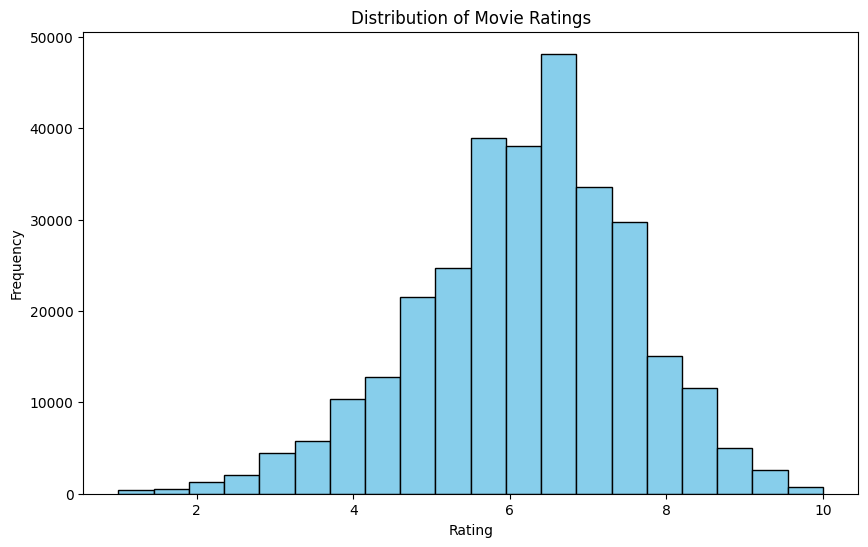

In [ ]:
plt.figure(figsize=(10,6))
#hereby we filter the rows and include only movies
movies_only = merged_data[merged_data['titleType'] == 'movie']
# we choose histogram as our plot type by plt.hist
plt.hist(movies_only['averageRating'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Scatter Plot of Ratings vs. Number of Votes


This scatter plot illustrates the relationship between movie ratings and the number of votes they received. Each point on the plot represents a movie, with its x-coordinate indicating the average rating and its y-coordinate representing the number of votes. By analyzing this plot, we can determine if there's any correlation between the ratings of movies and their popularity or engagement, as indicated by the number of votes. A positive correlation suggests that highly-rated movies tend to attract more votes, while a negative correlation implies the opposite.

Function Used: plt.scatter()

Plot Used:
The group opted for a scatter plot to visualize the relationship between movie ratings and the number of votes they received. Scatter plots are ideal for displaying the relationship between two continuous variables and identifying any patterns or trends in the data.

Rationale:
A scatter plot was chosen over other types of plots because it allows us to observe individual data points and assess the correlation between ratings and votes. By plotting each movie as a point on the graph, we can easily determine if there's a positive, negative, or no correlation between the two variables. This visualization helps analyze the popularity or engagement of movies based on their ratings.


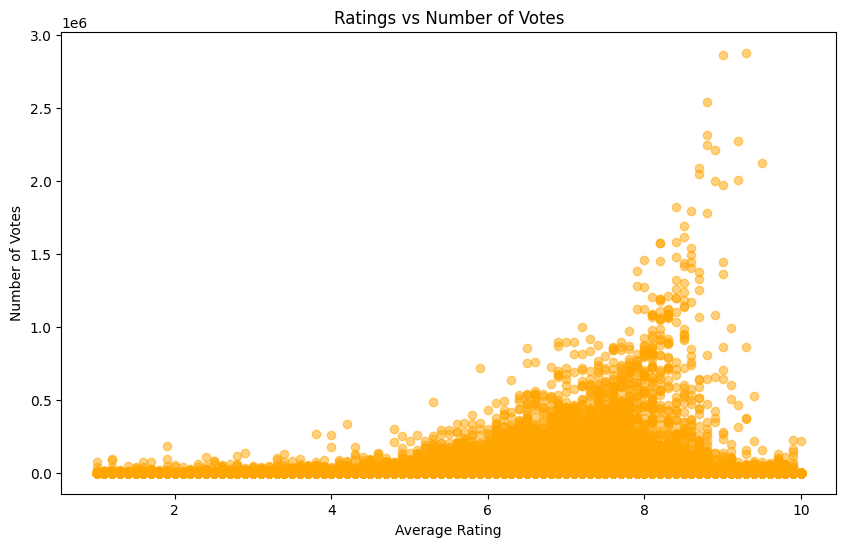

In [ ]:
plt.figure(figsize=(10,6))
# we choose plt.scatter to display a scatter plot
plt.scatter(merged_data['averageRating'],merged_data['numVotes'],alpha=0.5, color='orange')
# title would be named by plt.title
plt.title('Ratings vs Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

### Bar Plot of Title Genres


The bar plot of genres depicts the frequency of different title genres within the dataset. Each bar represents a genre category, and its height corresponds to the number of titles classified under that genre. This visualization allows us to identify the most prevalent genres in the dataset, providing insights into audience preferences or industry trends. By examining the top genres, we can understand the diversity of titles available and tailor content recommendations or marketing strategies accordingly.

Function Used: plt.bar()

Plot Used:
The group utilized a bar plot to illustrate the frequency of different movie genres within the dataset. Bar plots are effective for displaying categorical data and comparing the frequency of categories.

Rationale:
A bar plot was chosen because it provides a clear visual representation of the most prevalent movie genres in the dataset. By displaying the frequency of each genre as a bar, we can easily identify the most popular genres and understand audience preferences or industry trends. This visualization helps tailor content recommendations or marketing strategies based on genre preferences.


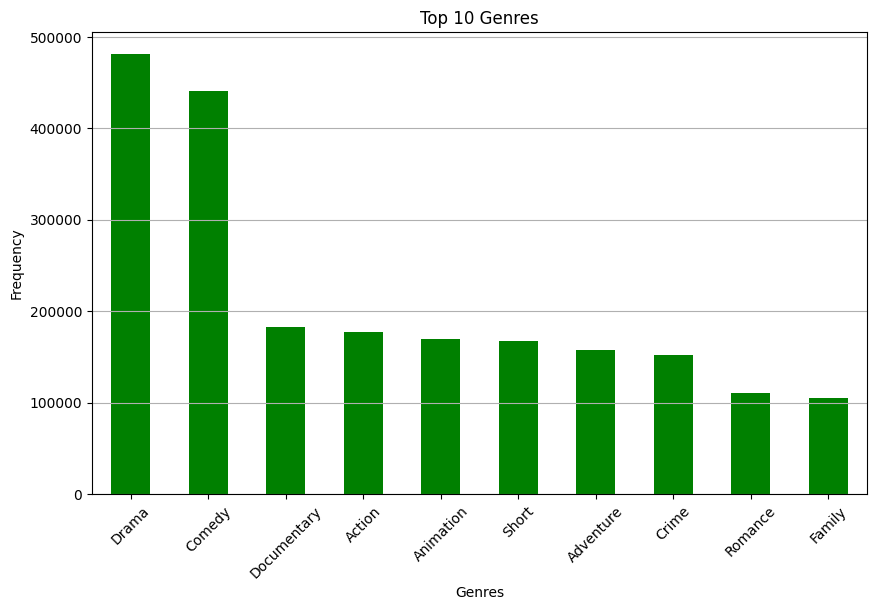

In [ ]:
# here we choose 'genres' data column and split the genres
genres_exploded = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')
# we select first ten genres
genres_count = genres_exploded['genres'].value_counts().head(10)
plt.figure(figsize=(10, 6))
genres_count.plot(kind='bar', color='green')
plt.title('Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
# rotating the x-axis by 45 degress to fit all the names of genres
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Bar Plot for the Popularity of Adult Movies

The plotted graph illustrates the evolving prevalence of adult movies within the film industry over 5-year intervals. Each bar on the chart corresponds to a 5-year period, showcasing the fluctuation in the proportion of adult films within the broader cinematic landscape. The y-axis represents the percentage of adult movies, while the x-axis delineates the respective 5-year intervals. This visualization offers insights into the changing trends and societal attitudes towards adult-themed content within the entertainment industry over time.

Function Used: .plot(kind='bar')

Plot Used: Bar plot

Rationale: The use of a bar plot is because it effectively displays discrete categories (the 5-year intervals) and their associated values (the percentage of adult movies). Bar plots are well-suited for showing comparisons between different categories or groups, making them ideal for illustrating changes over time, as in this case.



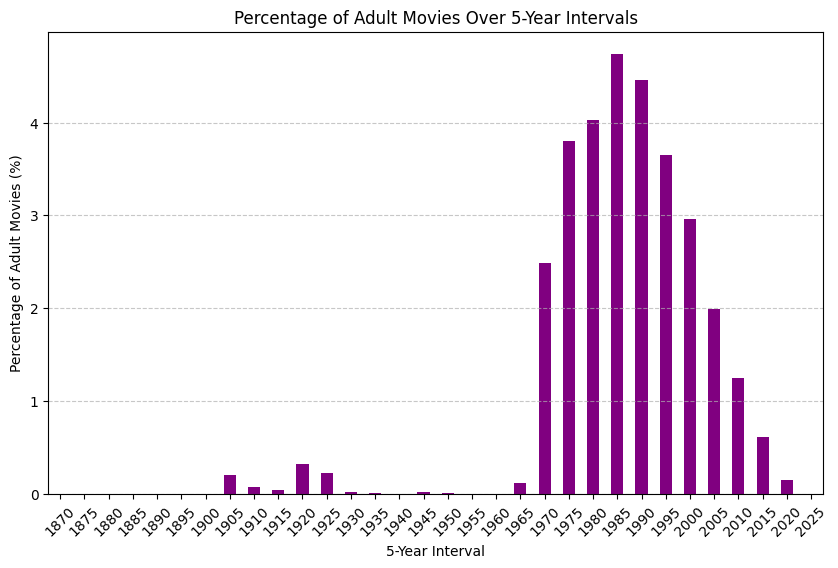

In [ ]:
merged_data['startYear'] = merged_data['startYear']
adult_movies = merged_data[merged_data['isAdult'] == 1]
total_movies = merged_data.groupby((merged_data['startYear'] // 5) * 5).size()
adult_movie_counts = adult_movies.groupby((adult_movies['startYear'] // 5) * 5).size()
percentage = (adult_movie_counts / total_movies) * 100
plt.figure(figsize=(10, 6))
percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Adult Movies Over 5-Year Intervals')
plt.xlabel('5-Year Interval')
plt.ylabel('Percentage of Adult Movies (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xticks(ticks=plt.xticks()[0], labels=[(int(label)*5+1870) for label in plt.xticks()[0]]) #fixing the fact that the years were represented as floats using some magic tricks

plt.show()

###Line Plot for Average Rating Over Years


This plot illustrates the trend of average ratings across different years. The x-axis represents the years in which the items in the dataset start, while the y-axis represents the average rating. Each point on the plot corresponds to the average rating calculated for a particular year. By examining this plot, you can recognize any overall trends or patterns in how the average ratings have evolved over time. It provides insights into whether there are any significant changes in the perceived quality of items in different years.

Function Used: plt.plot()

Plot Used: Line Plot

Rationale: Line plots are excellent for showing trends over time. By using this plot, viewers can easily see the overall pattern of how ratings have evolved over the years. It also emphasizes the sequential nature of the data.

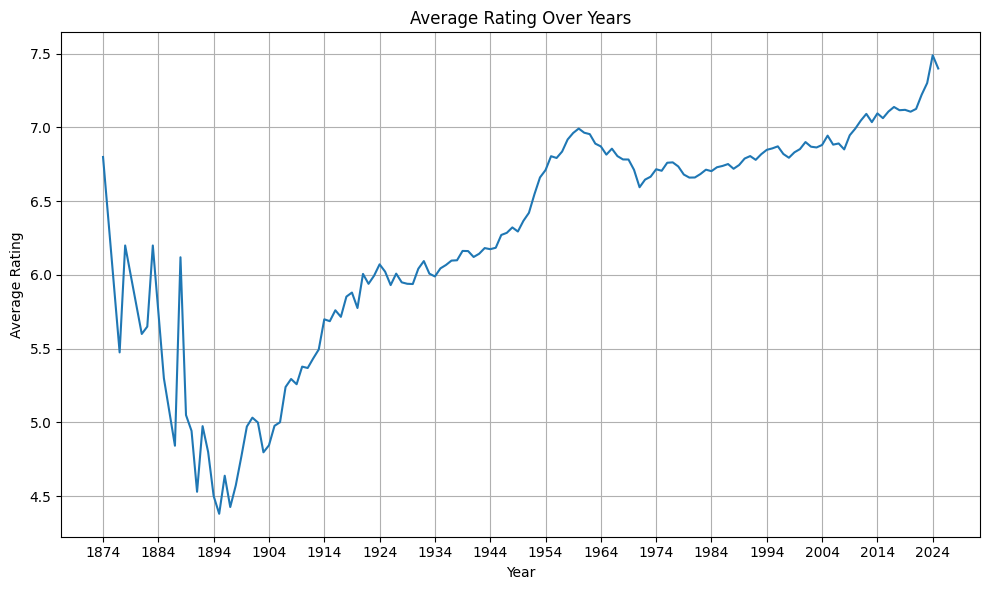

In [ ]:
average_ratings = merged_data.groupby('startYear')['averageRating'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_ratings.index, average_ratings.values)
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.xticks(range(int(min(average_ratings.index)), int(max(average_ratings.index))+1, 10))
plt.tight_layout()
plt.show()

### Bar Plot for Highest Rating Genres

The bar plot of highest rating movie genres depicts 10 highest rated movie genres and their ratings. Each bar represents a genre category, and its height corresponds to the average rating classified under that genre. By visually comparing the heights of the bars, we gain insights into which genres tend to receive the highest acclaim from both audiences and critics alike.

Function Used: .plot(kind='bar')

Plot Used: Bar plot

Rationale: The bar plot was chosen because it effectively represents the comparison of average ratings for different movie genres in a visually clear and straightforward manner. The height of each bar corresponds directly to the average rating for a specific genre, allowing for easy comparison between genres. This visual representation allows viewers to quickly identify which genres tend to receive the highest rating.

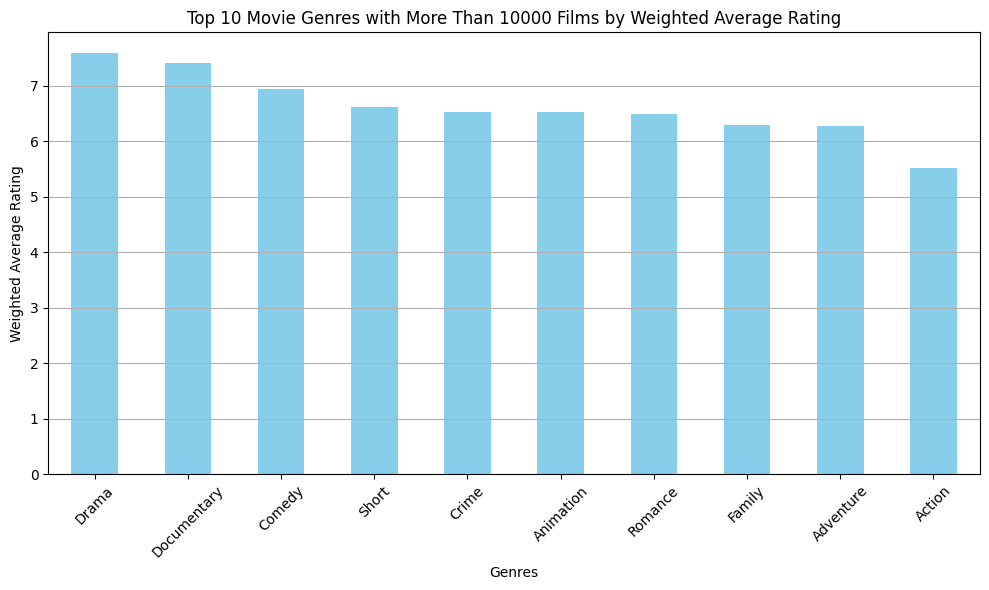

In [ ]:
genres_exploded = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')
genre_counts = genres_exploded['genres'].explode().value_counts()

popular_genres = genre_counts[genre_counts > 10000].head(10)

genre_weighted_avg_rating = (merged_data.explode('genres')
                             .groupby('genres')
                             .apply(lambda x: np.average(x['averageRating'], weights=x['numVotes']))
                             .loc[popular_genres.index]
                             .sort_values(ascending=False))

plt.figure(figsize=(10, 6))
genre_weighted_avg_rating.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres with More Than 10000 Films by Weighted Average Rating')
plt.xlabel('Genres')
plt.ylabel('Weighted Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###Histogram of Distribution of Runtime

The chart displays the distribution of runtime for titles included in the dataset provided. The x-axis represents the runtime of titles in minutes. The y-axis represents the frequency of titles falling within each runtime bin. From the chart, it can be observed that the majority of titles have runtimes clustered around certain values, with a peak in frequency occurring within a particular range of runtimes. This distribution provides insight into the typical duration of titles included in the dataset, helping to understand the common lengths of movies.

Function Used: plt.hist()

Plot Used: Histogram

Rationale: A histogram was used because it effectively displays the distribution of runtime data by dividing the runtimes into bins and representing the frequency of titles falling within each bin. This visualization allows for easy identification of patterns and trends in the data, such as the clustering of runtimes around certain values and the presence of peaks in frequency.

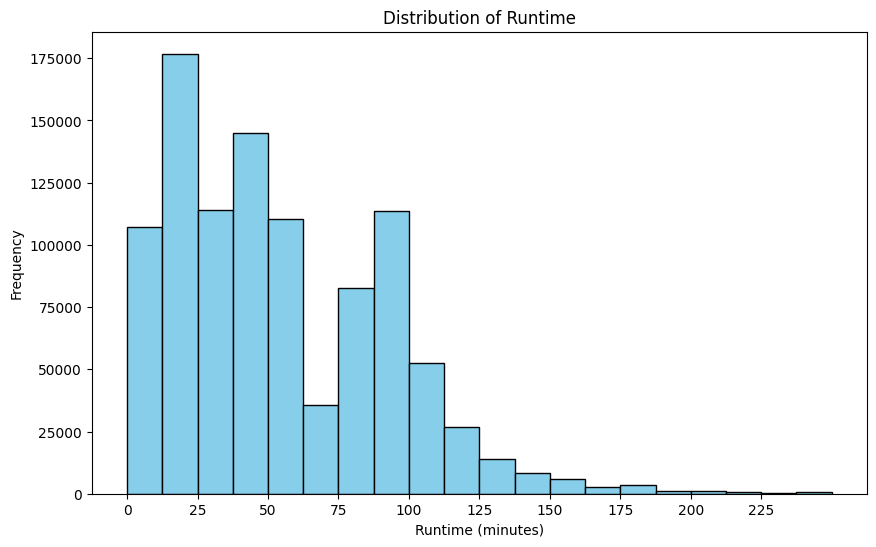

In [ ]:
merged_data = merged_data.dropna(subset=['runtimeMinutes'])
runtimes = merged_data['runtimeMinutes'].astype(int)
plt.figure(figsize=(10, 6))
plt.hist(runtimes, bins=20, range=(0, 250), color='skyblue', edgecolor='black')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.xticks(range(0, 250, 250//10))
plt.show()

###Average Runtime of the Top 10 genres


In the previous charts, we have already explored and plotted what the most popular genres are, and how the average runtimes are distributed. Now, we combine the two in order to find the highest average runtimes within the Top 10 genres. That is, we delve deeper into the specifics of genre-based runtime analysis. The x-axis categorizes the films by genre, each bar representing one of the Top 10 genres as identified by popularity. The y-axis quantifies the average runtime, measured in minutes, for the titles within each genre. The vertical bars rise to heights proportional to their respective genre's average duration, offering a clear visual comparison across genres.

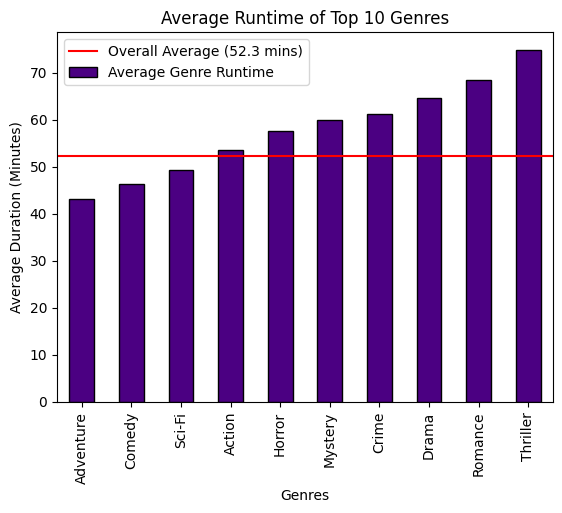

In [ ]:
genres_exploded = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')
#popularity as determined by the frequency of appearance
genre_popularity = genres_exploded.groupby('genres')['numVotes'].sum().sort_values(ascending=False)
top_10_genres = genre_popularity.head(10).index
#copying, since editing it directly gave a warning message
top_genres_df = genres_exploded[genres_exploded['genres'].isin(top_10_genres)].copy()
top_genres_df['runtimeMinutes'] = pd.to_numeric(top_genres_df['runtimeMinutes'], errors='coerce')
#average duration of all genres
all_genres_df=genres_exploded.copy()
all_genres_df['runtimeMinutes'] = pd.to_numeric(all_genres_df['runtimeMinutes'], errors='coerce')
overall_avg_runtime = all_genres_df['runtimeMinutes'].mean()
#average durations of the top 10
average_durations = top_genres_df.groupby('genres')['runtimeMinutes'].mean()
average_durations.sort_values(ascending=True).plot(kind='bar', color='indigo',  edgecolor='black', label='Average Genre Runtime', title='Average Runtime of Top 10 Genres')
#using a bar-chart seems appropriate, since we are dealing with genre-runtime tuples
plt.axhline(y=overall_avg_runtime, color='r', linestyle='-', label=f'Overall Average ({overall_avg_runtime:.1f} mins)')
plt.legend(loc='best')
plt.ylabel('Average Duration (Minutes)')
plt.xlabel('Genres')
plt.show()

###Pie chart displaying the proportion of Adult to Non-Adult titles within the genre that exhibits the highest relative prevalence of adult content

This pie chart delineates the proportion of Adult to Non-Adult titles within the genre exhibiting the highest relative prevalence of adult content. The chart is divided into two segments, with each slice representing the percentage of movies classified as either Adult or Non-Adult. This visualization not only reveals the composition of the genre in question but also contextualizes the extent of adult-oriented segment within it, offering an insight into genre-specific content distribution.

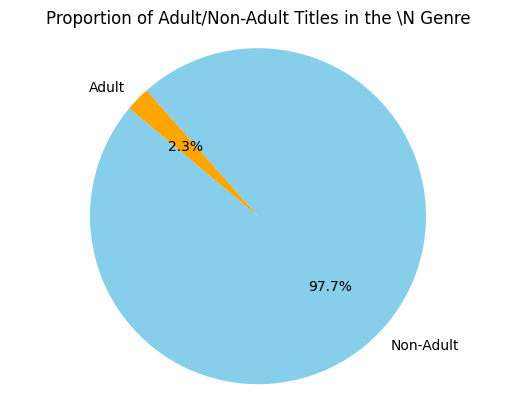

In [ ]:
#exploding genres in the same way as in the previous code snippet
genres_exploded = merged_data.assign(genres=merged_data['genres'].str.split(',')).explode('genres')
grouped = genres_exploded.groupby(['genres', 'isAdult']).size().unstack(fill_value=0)
#dropping "Adult" category, since it has 100%, which isn't informative to plot
grouped['proportion_adult'] = grouped[1] / (grouped[0] + grouped[1]).drop('Adult', axis=0)
highest_adult_proportion_genre = grouped['proportion_adult'].idxmax()
sizes = [grouped.loc[highest_adult_proportion_genre, 0],  # Non-adult movies
         grouped.loc[highest_adult_proportion_genre, 1]]  # Adult movies
labels = 'Non-Adult', 'Adult'
colors = ['skyblue', 'orange']
#the pie-chart is chosen for the given visulaisation, since it's generally used repsresenting relative proportions
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Proportion of Adult/Non-Adult Titles in the {highest_adult_proportion_genre} Genre')
plt.show()


##Conclusions and Findings

1. The average ratings have been steadily growing over the last several decades, which might be attributed to the fact that production companies are optimizing for making their titles (movies, TV-series, etc.) both more entertaining and addictive.

2. The proportion of titles targeted specifically at adults achieved its peak around 1985 but has been dropping ever since. That might be explainable by the fact that, originally, adult movies were a taboo. Later, societal liberalisation and the sexual revolution followed, which caused a several-decade-long rise in the number of adult-movies produced. After the 80s, the sexual revolution was followed by a reaction. Since the film studios are trying to cover an ever-larger audience to maximise revenue, they opt out of making adult-only movies.

3.     The modal movie rating is rather high: 7.5. Of course, there is no law stating that every distribution on the scale 0-10 must be a normal distribution with µ=5, yet the left skew is prominent and rather surprising. ​

    It might be explained by two factors: ​

    1. People generally like movies as a form of entertainment and are therefore likely to give them high ratings. ​

    2. People preselect movies before watching them, e.g. people are more likely to watch movies they will consequently like. When deciding whether to watch a given movie or not, people will first gather information about it, for example, from their friends' recommendations or review-aggregators.​

While plotting, we learnt about interesting information a dataset can represent.
We learnt how visualization adds to the overall understanding of a dataset.
A general understanding of what type of plot should be used for what type of information was another takeaway from this project.

##Meta-information


Anmol Kiran participated in the group project by:

*   arranging meetings and participating in general group communication
*   plotting three graphs significant to the nature of the data

Nguyen Vu Minh participated in the group project by:

*   participating in general group communication
*   plotting three graphs (Percentage of Adult Movies, Distribution of Runtime, Average Rating over Years)

Nguyen Duc Tung participated in the group project by:
*   participating in general group communication
*   doing and completing the reading, cleaning, merging and calculation parts
*   enhancing the layout of the project report to follow Jupyter Markdown
*   plotting one graph (Bar Plot for Highest Rating Genres)

Dmitrii Gusev participated in the group project by:
*   plotting two graphs (Adult/Non-Adult Titles pie-chart and Average Runtime of the Top 10 genres)
*   making the presentation
*   participating in the general group communication and establishing communication channels

To Duc Minh participated in the group project by:
*   participating in group communication and helped dividing group work
*   doing the reading, cleaning, merging and refactoring the code



##Source of the datasets:
*  https://datasets.imdbws.com/


##Python Libraries used in the project:
*  NumPy: https://numpy.org/
*  pandas: https://pandas.pydata.org/
*  Mathplotlib: https://matplotlib.org/